<a href="https://colab.research.google.com/github/suchet-kapoor/news_article_category_using_scrapy/blob/trial/news_artice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests,openpyxl
import pandas as pd
import numpy as np
import feedparser
import openpyxl

This  cell will create an excel sheet automatically using the links as defined in assingment. we created  4 columns title ,descriptions,link and published date


In [ ]:
excel=openpyxl.Workbook()
sheet=excel.active
sheet.title='my_final_sheet'
column_name=['TITLE','DESCRIPTION','LINK','Published Date']
sheet.append(column_name)
import feedparser
from bs4 import BeautifulSoup

rss_urls=[
    # "https://feeds.bbci.co.uk/news/world/rss.xml",
"https://feeds.feedburner.com/NewshourWorld",
"https://www.reutersagency.com/feed/",
"https://moxie.foxnews.com/google-publisher/politics.xml",
"https://cms.qz.com/feed/",
"http://rss.cnn.com/rss/cnn_topstories.rss"
]

for rss_url in rss_urls:
    feed = feedparser.parse(rss_url)
    for entry in feed.entries:
     print("\nTitle:", entry.title)
     print("Link:", entry.link)
     row_data = [entry.title, "", entry.link, ""]
     row_data[0] = entry.title
     row_data[2]=entry.link
     description = entry.get("description", "N/A")
     if description != "N/A":
        print("Description:")
        soup = BeautifulSoup(description, 'html.parser')
        relevant_text = ' '.join([p.get_text() for p in soup.find_all(['p', 'a'])])
        print(relevant_text)
        row_data[1] = relevant_text
     else:
        print("Description: N/A")
        row_data[1] = "N/A"
     if "published" in entry:
        print("Published Date:", entry.published)
        row_data[3] = entry.published
     else:
        print("Publication: N/A")
        row_data[3] = "NA"

     sheet.append(row_data)


excel.save('my_final_sheet.xlsx')



the link of bbc "https://feeds.bbci.co.uk/news/world/rss.xml" does have a defined published date in rss feed so we iterated it once more and saved it in diffrent sheet

In [ ]:

excel=openpyxl.Workbook()
sheet=excel.active
sheet.title='my sixth sheet'
column_name=['TITLE','DESCRIPTION','LINK']
sheet.append(column_name)
import feedparser
from bs4 import BeautifulSoup
rss_url1="https://feeds.bbci.co.uk/news/world/rss.xml"


# Parse the RSS feed
feed = feedparser.parse(rss_url1)
for entry in feed.entries:
    print("\nTitle:", entry.title)
    print("Link:", entry.link)
    row_data = [entry.title, "", entry.link, ""]

    # Check if "description" is present in the entry
    description = entry.get("description", "N/A")
    if description != "N/A":
        print("Description:")

        # Use BeautifulSoup to parse HTML and extract text
        soup = BeautifulSoup(description, 'html.parser')
        relevant_text = ' '.join([p.get_text() for p in soup.find_all(['p', 'a'])])

        print(relevant_text)

        row_data[1] = relevant_text
    else:
        print("Description: N/A")
        row_data[1] = "N/A"

    sheet.append(row_data)


excel.save('my sixth sheet.xlsx')


Combined both sheet to produce a final sheet


In [ ]:

existing_workbook = openpyxl.load_workbook('my_final_sheet.xlsx')
existing_sheet = existing_workbook.active

new_workbook = openpyxl.load_workbook('my sixth sheet.xlsx')
new_sheet = new_workbook.active


for row in new_sheet.iter_rows(min_row=2, values_only=True):
    existing_sheet.append(row)

existing_workbook.save('my_final_sheet.xlsx')

used date time function to published date


In [ ]:

# in this firt preprocessing steps we changed published column into date time using pandas
import pandas as pd
df = pd.read_excel(r'/content/my_final_sheet.xlsx')
df['Published Date'] = pd.to_datetime(df['Published Date'], errors='coerce')

# print(df['Published Date'].dtype)
df['Published Date'] = df['Published Date'].astype(str)

df['Published Date'] = df['Published Date'].apply(lambda x: x.replace('+00:00', ' '))

df.head(5)


,TITLE,DESCRIPTION,LINK,Published Date
0,Xi Jinping celebrates China’s rising power — a...,NaN,http://www.pbs.org/newshour/bb/xi-jinping-cele...,2017-10-18 22:35:21
1,"The battle for Mosul is over, but this hidden ...",NaN,http://www.pbs.org/newshour/bb/battle-mosul-hi...,2017-10-18 22:20:26
2,As Rohingya refugees continue to flee from per...,NaN,http://www.pbs.org/newshour/rundown/rohingya-r...,2017-10-18 20:58:34
3,Tillerson: ‘Heartbreaking’ reports of sufferin...,NaN,http://www.pbs.org/newshour/rundown/tillerson-...,2017-10-18 15:36:51
4,Far-right groups gain ground in Sweden and Ger...,NaN,http://www.pbs.org/newshour/bb/far-right-group...,2017-10-17 22:30:37


Preprocessing


In [ ]:
import spacy
import nltk
spacy.load('en_core_web_md')

spacy and en_core_web_md is big library so we have have ot load manually these pre processing features to get maximimum accuracy


In [ ]:
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')

In [ ]:
df = pd.read_excel(r'/content/my_final_sheet.xlsx')

In [ ]:
df.head()

,TITLE,DESCRIPTION,LINK,Published Date
0,Xi Jinping celebrates China’s rising power — a...,NaN,http://www.pbs.org/newshour/bb/xi-jinping-cele...,"Wed, 18 Oct 2017 22:35:21 +0000"
1,"The battle for Mosul is over, but this hidden ...",NaN,http://www.pbs.org/newshour/bb/battle-mosul-hi...,"Wed, 18 Oct 2017 22:20:26 +0000"
2,As Rohingya refugees continue to flee from per...,NaN,http://www.pbs.org/newshour/rundown/rohingya-r...,"Wed, 18 Oct 2017 20:58:34 +0000"
3,Tillerson: ‘Heartbreaking’ reports of sufferin...,NaN,http://www.pbs.org/newshour/rundown/tillerson-...,"Wed, 18 Oct 2017 15:36:51 +0000"
4,Far-right groups gain ground in Sweden and Ger...,NaN,http://www.pbs.org/newshour/bb/far-right-group...,"Tue, 17 Oct 2017 22:30:37 +0000"


check for null value among title and links

In [ ]:

df.isnull().sum()

TITLE               0
DESCRIPTION       147
LINK                0
Published Date     54
dtype: int64

In [ ]:
# df['DESCRIPTION'] = df['DESCRIPTION'].fillna('')

# df['new_column'] = df['TITLE'].astype(str) + df['DESCRIPTION'].astype(str)


Now we create a new column which will store the combination of title and description


In [ ]:
df['new_column'] = df['TITLE'].astype(str) + df['DESCRIPTION'].astype(str)

Uisng Matplotlib  toplot the wording type for first 5


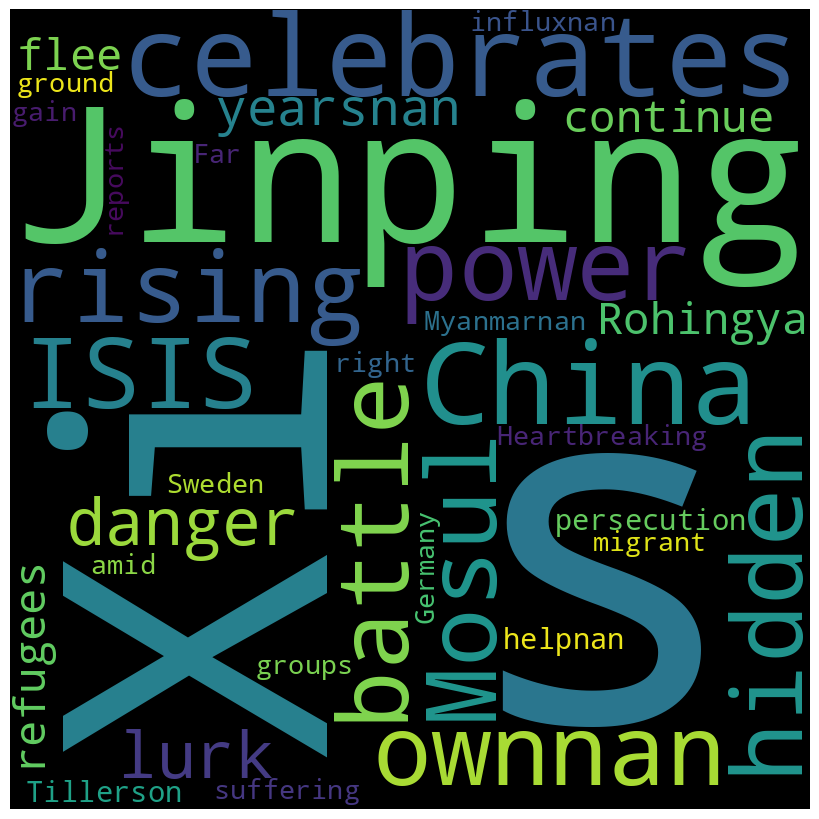

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud_instance = WordCloud(width=800, height=800,
                                   background_color='black',
                                   stopwords=None,
                                   min_font_size=10).generate(text)

    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud_instance)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

tags = ','.join(df['new_column'].head(5))

plot_word_cloud(tags)


Removing Puncatuation.stopwords and tokens form new_column


In [ ]:
import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

def remove_punctuation(text):
  # Tokenize the text
  tokens = nltk.word_tokenize(text)
  # Remove punctuation
  tokens = [token for token in tokens if token not in string.punctuation]
  # Remove stopwords
  stop_words = set(nltk.corpus.stopwords.words('english'))
  tokens = [token for token in tokens if token.lower() not in stop_words]
  # Join the tokens back into a string
  text = ' '.join(tokens)
  return text

df['new_column'] = df['new_column'].apply(remove_punctuation)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
print(df['new_column'].head().to_string(index=False))

Xi Jinping celebrates China ’ rising power — ow...
battle Mosul hidden ISIS danger could lurk year...
Rohingya refugees continue flee persecution ’ h...
Tillerson ‘ Heartbreaking ’ reports suffering M...
Far-right groups gain ground Sweden Germany ami...


Using function plot_word_cloud matplotlib plot after removing unwanted words

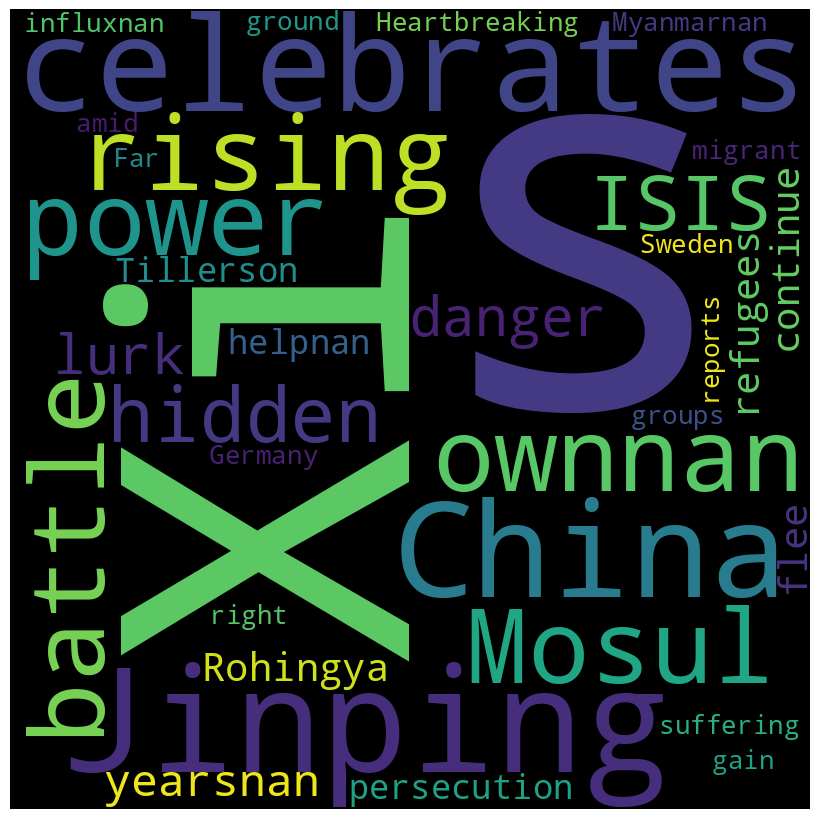

In [ ]:

tags = ','.join(df['new_column'].head(5))

# Plot the word cloud for the concatenated tags
plot_word_cloud(tags)


In [ ]:
df['DESCRIPTION'] = df['DESCRIPTION'].fillna('')
df['Published Date'] = df['Published Date'].fillna('')
df['new_column'] = df['TITLE'].astype(str) + df['DESCRIPTION'].astype(str)
df.head(5)


,TITLE,DESCRIPTION,LINK,Published Date,new_column
0,Xi Jinping celebrates China’s rising power — a...,,http://www.pbs.org/newshour/bb/xi-jinping-cele...,"Wed, 18 Oct 2017 22:35:21 +0000",Xi Jinping celebrates China’s rising power — a...
1,"The battle for Mosul is over, but this hidden ...",,http://www.pbs.org/newshour/bb/battle-mosul-hi...,"Wed, 18 Oct 2017 22:20:26 +0000","The battle for Mosul is over, but this hidden ..."
2,As Rohingya refugees continue to flee from per...,,http://www.pbs.org/newshour/rundown/rohingya-r...,"Wed, 18 Oct 2017 20:58:34 +0000",As Rohingya refugees continue to flee from per...
3,Tillerson: ‘Heartbreaking’ reports of sufferin...,,http://www.pbs.org/newshour/rundown/tillerson-...,"Wed, 18 Oct 2017 15:36:51 +0000",Tillerson: ‘Heartbreaking’ reports of sufferin...
4,Far-right groups gain ground in Sweden and Ger...,,http://www.pbs.org/newshour/bb/far-right-group...,"Tue, 17 Oct 2017 22:30:37 +0000",Far-right groups gain ground in Sweden and Ger...


yellow part shows that these values are not  in the dataset or are missing


<Axes: >

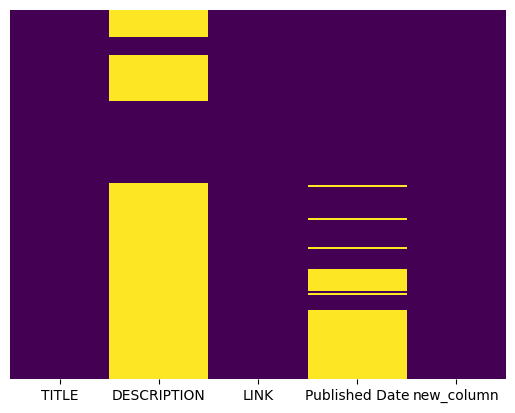

In [108]:
import seaborn as sns

sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
